
# Hollow Glass Ring in Air

N1 in Bird

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from scipy.linalg import null_space

importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [3]:
A = BraggExact(ts=[15e-6,.5*15e-6, 15e-6], mats=['air', 'glass', 'air'], 
               ns=[lambda x:n_air, lambda x:n_glass, lambda x:n_air],
              maxhs=[.1,.015, .1], wl=1.8e-6)


In [4]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

52.37439014709314

In [5]:
outer = 'h2'
nu = 1

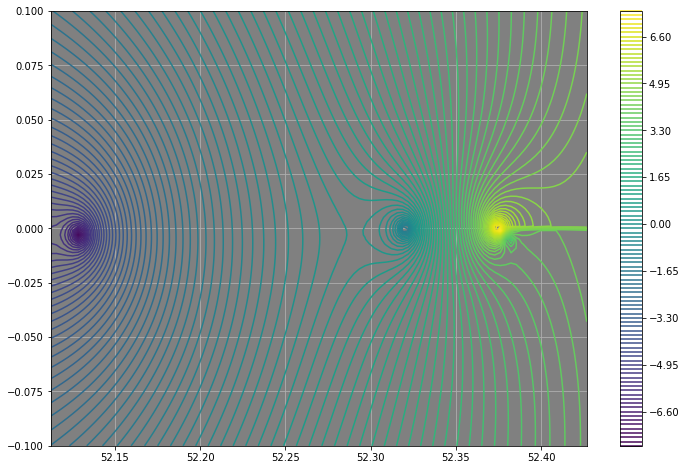

In [6]:
plotlogf(A.determinant, .995*k_low, 1.001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [7]:
guess = np.array(.9997 * k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.32043873213283-0.0002635420473771587j) . Residual of determinant:  1.3594835070340069e-12


# Bragg Exact Fields

In [8]:
Fs = A.all_fields(beta1, nu, outer)

In [9]:
Ez = Fs['Ez'].Compile(realcompile=True, wait=True)

In [10]:
Etv = Fs['Etv'].Compile(realcompile=True, wait=True)

### Electric

In [11]:
Draw(Ez, A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Etv.real, A.mesh)

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

### Magnetic

In [ ]:
Draw(1e1*Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

### Poynting Vector

In [ ]:
Draw(Fs['Sz'], A.mesh)

In [ ]:
Draw(Fs['Sr'], A.mesh)

In [ ]:
import ngsolve as ng
f = ng.x**2 + ng.y **3


In [ ]:
f = f.Compile()

In [ ]:
f.Compile(realcompile=True, wait=True)


In [ ]:
from ngsolve.special_functions import jv


In [ ]:
Draw(jv(ng.x,1), A.mesh)

In [ ]:
cf = jv(ng.x,1).Compile(realcompile=True, wait=True)

In [ ]:
cf = ng.CF([jv(ng.sqrt(ng.x**2 + ng.y**2),1),2,3]).Compile(realcompile=True, wait=True)